# Best Neighborhoods to open an Italian restaurant in Toronto

# 1. Introduction/Business Problem

### 1.1. Description of the problem

The problem consist in identifying the optimum place to open an Italian restaurant in the city of Toronto, Canada. <br> 
The target audience of this project are entrepreneurs of Italian food or owners of italian restaurants. <br>
More specifically, stakeholders who are interested in indentyfing the best Neighborhood candidates in Toronto to open a new Italian restaurant, so with the best group of candidates decide finally where to open it. 

### 1.2. Discussion of the background

One important aspect for a restaurant success is the place where it is located. Of course, the food and service are very important, however the location can be as crucial especially in the early years. Therefore it is necessary to make a good analysis of the location, in a first step of the neighborhood, of the restaurant before starting the operation. That’s why the stakeholders would care about this project.  <br> 
Some key aspects to take into account for this analysis are:
1. Parking.
2. Visibility.
3. Number of people who can pass near the restaurant.
4. Income of the Neighborhood.
5. Presence of near similiar restaurants.
6. Presence of other business that can attract people to the restaurant: Stadiums, parks, theaters, medical majors.




# 2. Data

### 2.1. Data description

For this analysis the following data is going to be used:
<ol>
<li>List of Neighborhoods in toronto: from <a href="https://open.toronto.ca/dataset/neighbourhoods/">The City of Toronto’s Open Data Portal</a></li>
<li>Latitude and longitude coordinates of neighborhoods: from <a href="https://open.toronto.ca/dataset/neighbourhoods/">The City of Toronto’s Open Data Portal</a> </li> 
<li>Venues near every neighborhood: from Foursquare Api</li>
<li>Population and income of each neighborhood: from <a href="https://open.toronto.ca/dataset/neighbourhood-profiles/">The City of Toronto’s Open Data Portal</a></li> 
</ol>
The City of Toronto’s Open Data Portal is an open source delivery tool to bring people and data together.

### 2.2. Data usage

The data is going to be used in the following way to solve the problem: 
</ul>
<li>The list of Neighborhoods and its coordinates data are going to be merged to identify the location of each neighborhood.</li>
<li>The population and income data of each neighborhood is going to be also merged with the previous data.</li>
<li>The venues data of every neighborhood is going to be classified in the following way: Parking and presence of other business that can attract people to the restaurant (like stadiums, theaters, medical majors) are going to be count as a "Collaborator Index" and similar restuarants (Italian food) are going to be count as a "Competitor index".  </li>
<li>Finally, K-mean machine learning will be used to cluster the neighborhoods with this data: Population, Income, Collaborator index and Competitor index. </li>
</ul>

We propose that is a benefit to the new restaurant to have higher values in population, income, Collaborator index and lower in Competitor index.

### Getting the location and demographic data

Import the neighborhoods data of Toronto with its location coordinates

In [2]:
#Import librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline

In [3]:
# The code was removed by Watson Studio for sharing.

(140, 16)


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,6721,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,6722,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,6723,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,6724,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,6725,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


Just get the features in which we are interested

In [4]:
df_loc = df_location[['AREA_SHORT_CODE', 'LONGITUDE', 'LATITUDE']]
df_loc.rename(columns={'AREA_SHORT_CODE': 'Neighbourhood Number'}, inplace = True)
df_loc.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Neighbourhood Number,LONGITUDE,LATITUDE
0,94,-79.425515,43.676919
1,100,-79.403590,43.704689
2,97,-79.397871,43.687859
3,27,-79.488883,43.765736
4,31,-79.457108,43.714672


In [5]:
df_loc.dtypes

Neighbourhood Number      int64
LONGITUDE               float64
LATITUDE                float64
dtype: object

We already have the location data. Now, lets import the demographic data (i.e. population and income) for each neighborhood.

In [6]:
body = client_061628de36364a85bb22e916f5825534.get_object(Bucket='capstonecoursera-donotdelete-pr-8yean8caiiodkk',Key='neighbourhood-profiles-2016-csv (2).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_demo = pd.read_csv(body)
print(df_demo.shape)
df_demo.head()


(2383, 146)


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


Just import the features in which we are interested

In [7]:
df_dem = df_demo.iloc[[0,2,944]].reset_index(drop=True)
df_dem = df_dem.drop(['_id','Category', 'Topic','Data Source', 'City of Toronto'], axis =1).set_index('Characteristic').transpose().reset_index()
df_dem = df_dem.astype({'Neighbourhood Number': 'int32'})
print(df_dem.shape)
df_dem.head()

(140, 4)


Characteristic,index,Neighbourhood Number,"Population, 2016",Total - Income statistics in 2015 for the population aged 15 years and over in private households
0,Agincourt North,129,"29,113","25,005"
1,Agincourt South-Malvern West,128,"23,757","20,400"
2,Alderwood,20,"12,054","10,265"
3,Annex,95,"30,526","26,295"
4,Banbury-Don Mills,42,"27,695","23,410"


Now we also have the demographic data. So, Merge the 2 dataframes to have a complete dataframe with our information

In [8]:
df = pd.merge(df_loc, df_dem, on= 'Neighbourhood Number')
df.rename(columns={'index': 'Neighborhood', 'LONGITUDE':'Longitude', 'LATITUDE':'Latitude'}, inplace = True)
df.head()


,Neighbourhood Number,Longitude,Latitude,Neighborhood,"Population, 2016",Total - Income statistics in 2015 for the population aged 15 years and over in private households
0,94,-79.425515,43.676919,Wychwood,"14,349","11,345"
1,100,-79.403590,43.704689,Yonge-Eglinton,"11,817","9,995"
2,97,-79.397871,43.687859,Yonge-St.Clair,"12,528","11,170"
3,27,-79.488883,43.765736,York University Heights,"27,593","23,530"
4,31,-79.457108,43.714672,Yorkdale-Glen Park,"14,804","12,065"


### Mapping the neighborhoods

Let's see each neighborhood in the Toronto's map.

In [9]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Get Toronto's coordinates

In [10]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt



In [12]:
import folium # map rendering library

In [13]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

In [14]:
map_toronto

So we have already our neighborhoods location.

### Foursquare API

 Now let's get the Venues data from the Foursquare API. Remembering that we are interested in all venues to classify them into two indices: Collaborators and competitors. 

In [15]:
CLIENT_ID = 'FKZQAGS535VE3LFRIBJAZDJ3LSKUXL0A0FCUKGNM5EPDOGDN' # your Foursquare ID
CLIENT_SECRET = 'TTQY2VVNTR4YRXWMCRR3CVRWS22NXEAN5SN4M2IYJ0HNBKPW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FKZQAGS535VE3LFRIBJAZDJ3LSKUXL0A0FCUKGNM5EPDOGDN
CLIENT_SECRET:TTQY2VVNTR4YRXWMCRR3CVRWS22NXEAN5SN4M2IYJ0HNBKPW


In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
#function that get the nearby venues for each neighborhood
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Let's get Toronto Venues with the defined function

In [19]:
# type your answer here

toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Wychwood
Yonge-Eglinton
Yonge-St.Clair
York University Heights
Yorkdale-Glen Park
Lambton Baby Point
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Leaside-Bennington
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Mimico (includes Humber Bay Shores)
Morningside
Moss Park
Mount Dennis
Mount Olive-Silverstone-Jamestown
Mount Pleasant East
Mount Pleasant West
New Toronto
Newtonbrook East
Newtonbrook West
Niagara
North Riverdale
North St. James Town
O'Connor-Parkview
Oakridge
Oakwood Village
Old East York
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Pleasant View
Princess-Rosethorn
Regent Park
Rexdale-Kipling
Rockcliffe-Smythe
Roncesvalles
Rosedale-Moore Park
Rouge
Runnymede-Bloor West Village
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Steeles
Stonegate-Queensway
Tam O'Shanter-Sullivan
Taylor-Massey
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Trinity-Bellwoods
Unive

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(2028, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,The Stop,43.679793,-79.423825,Convenience Store
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


So, we have our data of the venues near each neighborhood in Toronto. We finish the data gathering phase. 


# 3. Methodology

Let's try to understand our venues data. First, let's see how many venues we collect from each neighborhood.

Text(0.5, 1.0, 'Number of venues nearby each neighborhood')

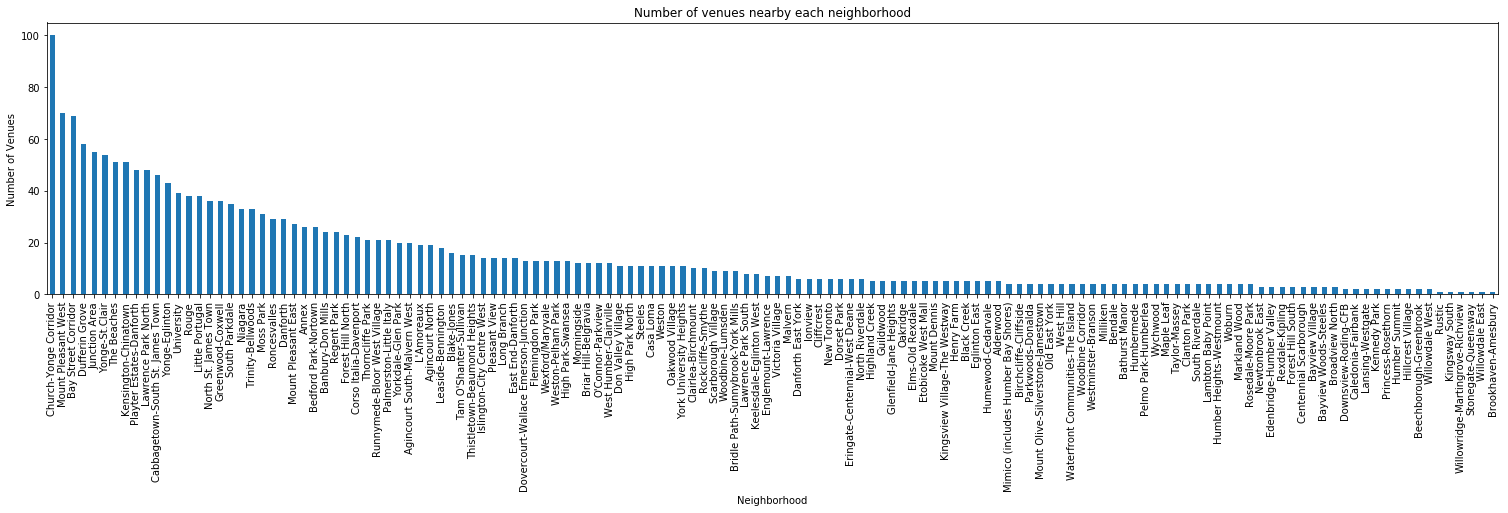

In [21]:
fig = plt.figure(figsize=(26, 5))
pd.value_counts(toronto_venues['Neighborhood']).plot.bar()
plt.xlabel('Neighborhood')
plt.ylabel('Number of Venues')
plt.title('Number of venues nearby each neighborhood')

In [27]:
print('The total number of unique neighborhoods are {}, and the total count of venues are {}.'.format(toronto_venues['Neighborhood'].nunique(), toronto_venues['Neighborhood'].count()))

The total number of unique neighborhoods are 138, and the total count of venues are 2028.


In [31]:
a = toronto_venues['Venue Category'].value_counts()
print('The total number of unique venues catogories are {}.'.format(toronto_venues['Venue Category'].nunique()))


The total number of unique venues catogories are 285.


Let's see the top 50 venues categories with more number of venues in Toronto.

Text(0.5, 1.0, 'Top 50 category venues in Toronto')

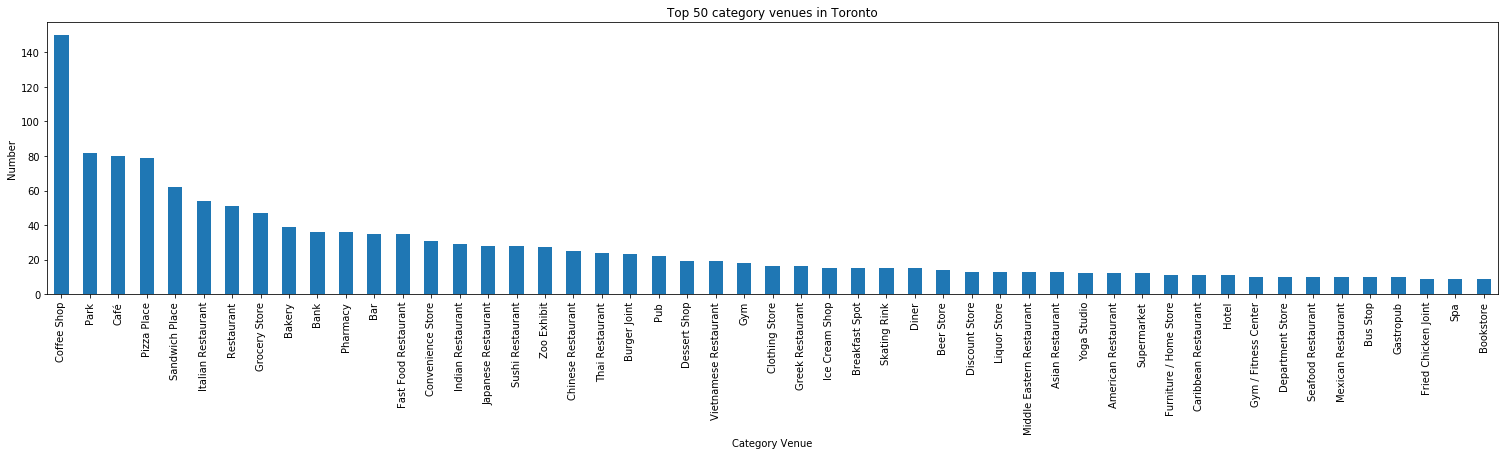

In [24]:
fig = plt.figure(figsize=(26, 5))
pd.value_counts(toronto_venues['Venue Category']).plot.bar()
plt.xlim(-0.5, 50.5)
plt.xlabel('Category Venue')
plt.ylabel('Number')
plt.title('Top 50 category venues in Toronto')

Now that we understand better the data, let's proceed to identify which venues are restaurants and Italian Restaurants (our competitors).

In [25]:
toronto_venues['Restaurant'] = toronto_venues['Venue Category'].str.contains('Restaurant')
toronto_venues['Italian Res'] = toronto_venues['Venue Category'].str.contains('Italian Restaurant')
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurant,Italian Res
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market,False,False
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space,False,False
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park,False,False
3,Wychwood,43.676919,-79.425515,The Stop,43.679793,-79.423825,Convenience Store,False,False
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym,False,False


In [26]:
toronto_venues['Restaurant'].value_counts(), toronto_venues['Italian Res'].value_counts()

(False    1556
 True      472
 Name: Restaurant, dtype: int64, False    1974
 True       54
 Name: Italian Res, dtype: int64)

So we have, 472 Restaurants and 54 Italian Restaurants. Now, Define our functions that qualify the competitors and the collaborators indices: <br>

</ul>
<li>Competitor's index: if it is a restaurant +1 point; and if is an Italian Restaurant +10 points. We try to penalize a lot higher if it is an Italian Restaurant. As far as this index increase, the sector is very competitive for an italian Restaurant. </li>
<li>Collaborators's index: Every venues which is not a Restaurant we give +1 point. As far as this index increase, the sector have more venues to attract more people, which is good for the restaurant. </li>
</ul>

In [27]:
def califierCom(row):
    count = 0
    if row['Restaurant'] == True :
        count = count + 1
    if row['Italian Res'] == True : 
        count = count + 10
  
    return count

def califierCol(row):
    count = 0
    if row['Restaurant'] == False and row['Italian Res'] == False :
        count = count + 1
    return count

Apply the functions to the data:

In [28]:
toronto_venues['Competitors'] = toronto_venues.apply (lambda row: califierCom(row), axis=1)
toronto_venues['Collaborators'] = toronto_venues.apply (lambda row: califierCol(row), axis=1)
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Restaurant,Italian Res,Competitors,Collaborators
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market,False,False,0,1
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space,False,False,0,1
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park,False,False,0,1
3,Wychwood,43.676919,-79.425515,The Stop,43.679793,-79.423825,Convenience Store,False,False,0,1
4,Yonge-Eglinton,43.704689,-79.403590,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym,False,False,0,1


Now, group the indices by neighborhoods

In [29]:
toronto_grouped = toronto_venues.groupby('Neighborhood').sum().reset_index()
toronto_grouped = toronto_grouped[['Neighborhood', 'Competitors', 'Collaborators']]
toronto_grouped.head()

,Neighborhood,Competitors,Collaborators
0,Agincourt North,5,14
1,Agincourt South-Malvern West,15,5
2,Alderwood,0,5
3,Annex,4,22
4,Banbury-Don Mills,12,22


Now, join the indices data with the demographic data of each neighborhood

In [30]:
toronto_cluster = toronto_grouped.join(df.set_index('Neighborhood'), on='Neighborhood')


In [31]:
toronto_cluster.rename(columns={'Population, 2016': 'Population', 'Total - Income statistics in 2015 for the population aged 15 years and over in private households': 'Income' }, inplace = True)
toronto_cluster = toronto_cluster.drop(['Neighbourhood Number','Longitude', 'Latitude'], axis =1).set_index('Neighborhood')
toronto_cluster.head()

,Competitors,Collaborators,Population,Income
Neighborhood,,,,
Agincourt North,5,14,"29,113","25,005"
Agincourt South-Malvern West,15,5,"23,757","20,400"
Alderwood,0,5,"12,054","10,265"
Annex,4,22,"30,526","26,295"
Banbury-Don Mills,12,22,"27,695","23,410"


In [32]:
toronto_cluster['Population']=toronto_cluster['Population'].apply(lambda x: x.replace(',',''))
toronto_cluster['Income']=toronto_cluster['Income'].apply(lambda x: x.replace(',',''))

In [33]:
toronto_cluster = toronto_cluster.astype({'Population': 'int32', 'Income' : 'int32'})

In [34]:
toronto_cluster.head()

,Competitors,Collaborators,Population,Income
Neighborhood,,,,
Agincourt North,5,14,29113,25005
Agincourt South-Malvern West,15,5,23757,20400
Alderwood,0,5,12054,10265
Annex,4,22,30526,26295
Banbury-Don Mills,12,22,27695,23410


Finally we have our dataframe which contains the data for the clustering. 

### Begin with Clustering

We are going to apply the clustering machine learning algorithm to cluster our neighborhoods of Toronto based in the features we have. 

In [40]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

Normalize data

In [41]:
from sklearn import preprocessing

x = toronto_cluster.values
x[0:10]

array([[    5,    14, 29113, 25005],
       [   15,     5, 23757, 20400],
       [    0,     5, 12054, 10265],
       [    4,    22, 30526, 26295],
       [   12,    22, 27695, 23410],
       [    0,     4, 15873, 13270],
       [   46,    53, 25797, 23945],
       [    0,     3, 21396, 18730],
       [    0,     3, 13154, 11150],
       [   40,    16, 23236, 18560]])

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
toronto_scaled = pd.DataFrame(x_scaled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
toronto_scaled.head()

,0,1,2,3
0,0.053763,0.189189,0.379803,0.348198
1,0.161290,0.067568,0.289538,0.267031
2,0.000000,0.067568,0.092305,0.088393
3,0.043011,0.297297,0.403617,0.370935
4,0.129032,0.297297,0.355905,0.320085


### Finding Optimal Number of Clusters

In [44]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(toronto_scaled)
    Sum_of_squared_distances.append(km.inertia_)

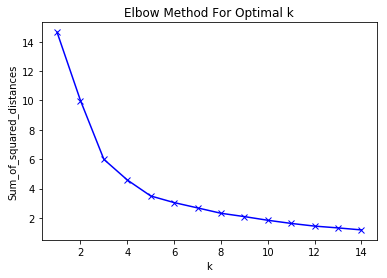

In [47]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The Elbow method shows that k=5 is the optimal k for this dataset. So we proceed with this number of clusters with the k-means algorithm.

In [48]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([1, 1, 0, 1, 1, 0, 3, 1, 0, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 3, 1, 0, 0, 3, 4, 0, 1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 4, 1, 0, 2,
       0, 0, 4, 0, 0, 4, 0, 2, 0, 0, 1, 1, 0, 4, 0, 1, 4, 3, 0, 0, 1, 0,
       4, 0, 0, 1, 0, 4, 1, 0, 4, 0, 0, 0], dtype=int32)

In [49]:
# add clustering labels to the dataframe

toronto_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_cluster.head()

,Cluster Labels,Competitors,Collaborators,Population,Income
Neighborhood,,,,,
Agincourt North,1,5,14,29113,25005
Agincourt South-Malvern West,1,15,5,23757,20400
Alderwood,0,0,5,12054,10265
Annex,1,4,22,30526,26295
Banbury-Don Mills,1,12,22,27695,23410


In [50]:
toronto_cluster.reset_index(level=0, inplace=True)

Restore all the data with the original features and with the cluster labels

In [51]:
toronto_final = toronto_cluster.join(df[['Latitude','Longitude', 'Neighborhood']].set_index('Neighborhood'), on='Neighborhood')
toronto_final.head()

,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
0,Agincourt North,1,5,14,29113,25005,43.805441,-79.266712
1,Agincourt South-Malvern West,1,15,5,23757,20400,43.788658,-79.265612
2,Alderwood,0,0,5,12054,10265,43.604937,-79.541611
3,Annex,1,4,22,30526,26295,43.671585,-79.404001
4,Banbury-Don Mills,1,12,22,27695,23410,43.737657,-79.349718


In [52]:
toronto_final.shape

(138, 8)

### Mapping the cluster Neighborhoods

Let's see the cluster neighborhoods in the Toronto Map

In [53]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

In [55]:
map_clusters #0-Red / 1-Purple / 2-blue / 3-Green / 4-Orange 

The map looks good!

# 4. Results

Now, we can examine each cluster and determine the discriminating characteristics that distinguish each cluster. Let's examine the 5 clusters

### Cluster 0

In [69]:
toronto_clus_0 = toronto_final.loc[toronto_final['Cluster Labels'] == 0]
print(toronto_clus_0.shape)
toronto_clus_0.head()

(65, 8)


,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
2,Alderwood,0,0,5,12054,10265,43.604937,-79.541611
5,Bathurst Manor,0,0,4,15873,13270,43.764813,-79.456055
8,Bayview Woods-Steeles,0,0,3,13154,11150,43.796802,-79.382118
10,Beechborough-Greenbrook,0,2,0,6577,5250,43.693216,-79.479473
14,Blake-Jones,0,2,14,7727,6280,43.676173,-79.337394


### Cluster 1

In [70]:
toronto_clus_1 = toronto_final.loc[toronto_final['Cluster Labels'] == 1]
print(toronto_clus_1.shape)
toronto_clus_1.head()

(40, 8)


,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
0,Agincourt North,1,5,14,29113,25005,43.805441,-79.266712
1,Agincourt South-Malvern West,1,15,5,23757,20400,43.788658,-79.265612
3,Annex,1,4,22,30526,26295,43.671585,-79.404001
4,Banbury-Don Mills,1,12,22,27695,23410,43.737657,-79.349718
7,Bayview Village,1,0,3,21396,18730,43.776361,-79.377117


### Cluster 2

In [71]:
toronto_clus_2 = toronto_final.loc[toronto_final['Cluster Labels'] == 2]
print(toronto_clus_2.shape)
toronto_clus_2.head()

(7, 8)


,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
58,Islington-City Centre West,2,8,6,43965,37410,43.633463,-79.543317
65,L'Amoreaux,2,6,13,43993,37385,43.795716,-79.314084
73,Malvern,2,3,4,43794,35865,43.803658,-79.222517
104,Rouge,2,2,36,46496,38125,43.821201,-79.186343
120,Waterfront Communities-The Island,2,0,4,65913,61985,43.633880,-79.377202


### Cluster 3

In [74]:
toronto_clus_3 = toronto_final.loc[toronto_final['Cluster Labels'] == 3]
print(toronto_clus_3.shape)
toronto_clus_3.head()

(5, 8)


,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
6,Bay Street Corridor,3,46,53,25797,23945,43.657511,-79.385721
23,Church-Yonge Corridor,3,46,74,31340,29085,43.659649,-79.379017
27,Corso Italia-Davenport,3,93,9,14133,12175,43.677661,-79.447469
83,Mount Pleasant West,3,84,46,29658,26550,43.704435,-79.393360
135,Yonge-St.Clair,3,57,37,12528,11170,43.687859,-79.397871


### Cluster 4

In [75]:
toronto_clus_4 = toronto_final.loc[toronto_final['Cluster Labels'] == 4]
print(toronto_clus_4.shape)
toronto_clus_4.head()

(21, 8)


,Neighborhood,Cluster Labels,Competitors,Collaborators,Population,Income,Latitude,Longitude
9,Bedford Park-Nortown,4,40,16,23236,18560,43.731486,-79.420227
19,Cabbagetown-South St. James Town,4,31,35,11669,10195,43.667648,-79.366107
28,Danforth,4,10,19,9666,7950,43.684025,-79.329819
34,Dufferin Grove,4,12,46,11785,10430,43.655428,-79.437341
46,Greenwood-Coxwell,4,13,23,14417,11915,43.672612,-79.324318


Let's examine the differences and simmilarities between the clusters with a graphic tool. Use boxplot for each feature and cluster

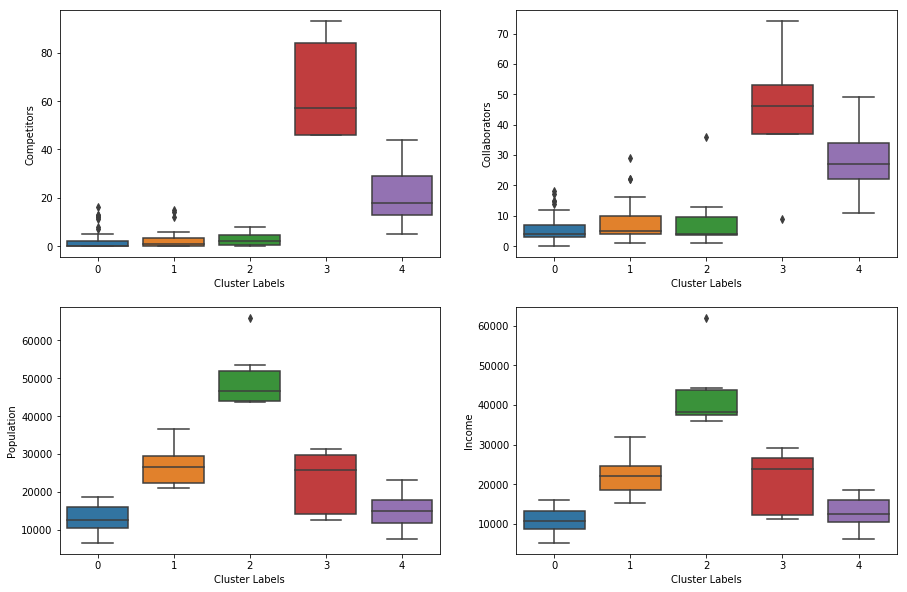

In [77]:
import seaborn as sns


fig, axs = plt.subplots(ncols=2, nrows= 2, figsize=(15,10))
sns.boxplot(x="Cluster Labels", y="Competitors", data=toronto_final,ax=axs[0,0])
sns.boxplot(x="Cluster Labels", y="Collaborators", data=toronto_final,ax=axs[0,1])
sns.boxplot(x="Cluster Labels", y="Population", data=toronto_final,ax=axs[1,0])
sns.boxplot(x="Cluster Labels", y="Income", data=toronto_final,ax=axs[1,1])

# 5. Discussion

With the previous graph we can analyze the main characteristics of each cluster and classify them as follows:
1. Cluster 0: Low Competitors, low collaborators, low population and low income.
2. Cluster 1: Low Competitors, low collaborators, medium population and medium income.
3. Cluster 2: Low Competitors, low collaborators, high population and high income.
4. Cluster 3: High Competitors, high collaborators, medium population and medium income.
5. Cluster 4: Medium Competitors, medium collaborators, low population and low income.

We can drive some conclusions from these results. <br>
Definitely cluster 0 is not a good option for the restaurant. <br> 
Cluster 1 has medium population and income, but as it has low collaborators it seems that those neighborhoods does not attract people to the business. So this is not a good option too. <br>

So we have finally 3 options.

We can drive some conclusions from these results. <br>
Cluster 0, definitely, is not a good option for the restaurant. <br> 
Cluster 1 has medium population and income, but as it has low collaborators it seems that those neighborhoods does not attract people to the business. So this is not a good option too. <br>

So we have finally 3 options. <br>
Cluster 2, has high population and income, this may be a good option, however it has low collaborators. It seems to be neighborhoods were a lot of people live but with few venues which attracts other people, so this is maybe a risky sector. If the stakeholder is beginning with its business is not a good option but if he is with confidence and experience it could be an excellent place. 
Cluster 3, has high collaborators so it is good to attract people, but it also has high competitors. This may be good for a renowned Restaurant which many costumers know about it but may be not a good options for new restaurants. 
Cluster 4, may be a good option because it has medium collaborators and also medium competitors (is not too high). So maybe this are the best neighborhoods to start with an Italian Restaurant.
 

# 6. Conclusion

We did the clustering of Toronto neighborhoods based on the business problem which consists of identifying the optimum place to open an Italian restaurant in the city. 

We cluster successfully the neighborhoods in 5 groups with the data features: population, income, competitor’s index and collaborator’s index (from venues data). 

Not only we obtain the best group of neighborhoods to start the Restaurant, but also, we understand the characteristics of the other clusters.

As a summary we obtain the following groups:

-	Good neighborhoods for renowned restaurants.
-	Good neighborhoods for new restaurants.
-	Good neighborhoods for experienced stakeholders.
-	Bad places for a restaurant (for 2 clusters). 

The model may be improved in the following aspects: 

-	Optimizing the functions of Collaborator’s and Competitor’s index: like giving a higher score to a stadium and a lower to a coffee shop, because the first one attracts more people. 
-	Adding more features: like customers scores of the existing restaurants and visibility of the places.
